In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.interpolate import interp1d
from scipy.io import wavfile

import soundfile as sf

In [2]:
from pp_utils.core import generate_data_path_dict, MISC_PARAMS, HYDRO_PARAMS
from pp_utils.file_handling import df_main_loader

## Set up paths

In [3]:
data_path = generate_data_path_dict(Path("../data_processed/"))
raw_path = Path("../data_raw/")

In [4]:
output_path = data_path["main"] / "data_summary"
hydro_wav_path = data_path["main"] / "hydrophone/wav_filtered"  # filtered hydrophone wav files

### Load main dataframe

In [5]:
df_main = df_main_loader(
    folder=data_path["info_csv"], filename="main_info_append_10.csv",
)

In [6]:
df_summary = pd.read_csv(output_path / "data_summary_all.csv", index_col=0)

## Verify reading hydrophone wavfile

In [7]:
trial_plot = [223, 196]

In [8]:
def check_hydro_sig(sig_ori, sig_filt):
    plt.figure(figsize=(12, 3))
    plt.plot(sig_ori, lw=1, alpha=0.7, label="original")
    plt.plot(sig_filt, lw=1, alpha=0.7, label="filtered")
    plt.legend()
    plt.show()

### Trial 223

In [9]:
trial_idx = trial_plot[0]
ts = df_main.iloc[trial_idx]

In [10]:
hydro_file_0 = raw_path / ts["target_hydrophone_path"] / ts["hydro_filename"]
hydro_sig_0_sf, hydro_fs_0_sf = sf.read(hydro_file_0)
hydro_fs_0_scipy, hydro_sig_0_scipy = wavfile.read(hydro_file_0)

In [11]:
hydro_file_1 = list(hydro_wav_path.glob(f"t{trial_idx:03d}_*.wav"))[0]
hydro_fs_1_scipy, hydro_sig_1_scipy = wavfile.read(hydro_file_1)
hydro_sig_1_sf, hydro_fs_1_sf = sf.read(hydro_file_1)

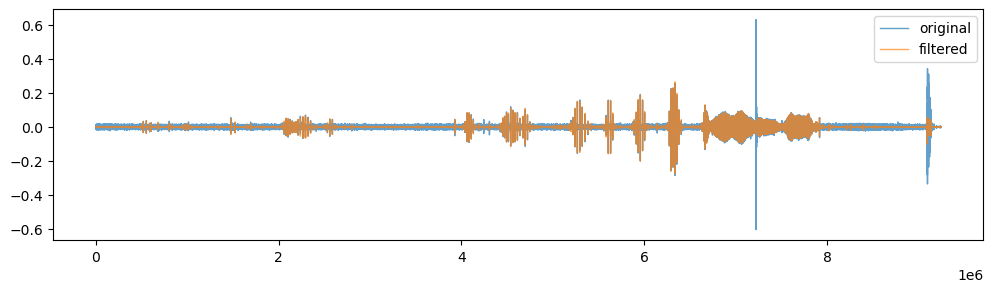

In [12]:
# ch0
check_hydro_sig(hydro_sig_0_sf[:, 0], hydro_sig_1_sf[:, 0])

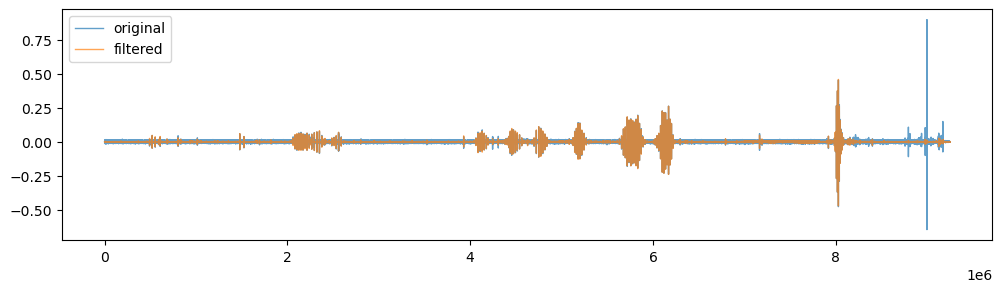

In [13]:
# ch1
check_hydro_sig(hydro_sig_0_sf[:, 1], hydro_sig_1_sf[:, 1])

### Trial 196

In [14]:
trial_idx = trial_plot[1]
ts = df_main.iloc[trial_idx]

In [15]:
hydro_file_0 = raw_path / ts["target_hydrophone_path"] / ts["hydro_filename"]
hydro_sig_0_sf, hydro_fs_0_sf = sf.read(hydro_file_0)
hydro_fs_0_scipy, hydro_sig_0_scipy = wavfile.read(hydro_file_0)

In [16]:
hydro_file_1 = list(hydro_wav_path.glob(f"t{trial_idx:03d}_*.wav"))[0]
hydro_fs_1_scipy, hydro_sig_1_scipy = wavfile.read(hydro_file_1)
hydro_sig_1_sf, hydro_fs_1_sf = sf.read(hydro_file_1)

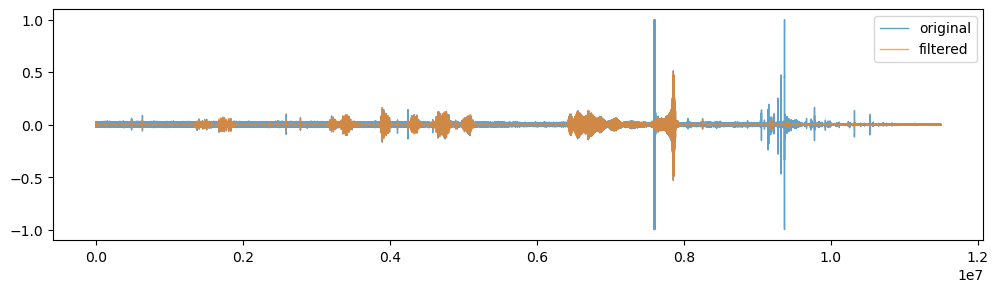

In [17]:
# ch0
check_hydro_sig(hydro_sig_0_sf[:, 0], hydro_sig_1_sf[:, 0])

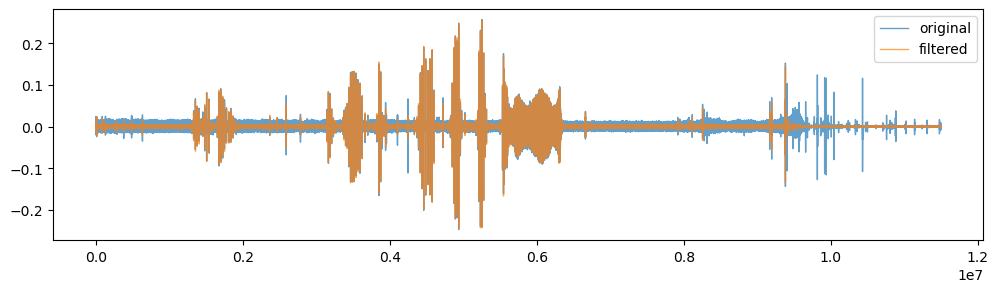

In [18]:
# ch1
check_hydro_sig(hydro_sig_0_sf[:, 1], hydro_sig_1_sf[:, 1])